<a href="https://colab.research.google.com/github/springboardmentor1234x-stack/CreditPath-AI/blob/Shaizeen/new_Credit_Path_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_excel('/content/loan_data.csv.xlsx')
print("Shape of the dataset is:", df.shape)
print(df.head())

Shape of the dataset is: (45000, 14)
   person_age person_gender person_education  person_income  person_emp_exp  \
0          22        female           Master        71948.0             0.0   
1          21        female      High School        12282.0             0.0   
2          25        female      High School        12438.0             3.0   
3          23        female         Bachelor        79753.0             0.0   
4          24          male           Master        66135.0             1.0   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT      35000    PERSONAL          16.02   
1                   OWN       1000   EDUCATION          11.14   
2              MORTGAGE       5500     MEDICAL          12.87   
3                  RENT      35000     MEDICAL          15.23   
4                  RENT      35000     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   44998 non-null  float64
 4   person_emp_exp                  44995 non-null  float64
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   44998 non-null  float64
 9   loan_percent_income             44998 non-null  float64
 10  cb_person_cred_hist_length      44995 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.499800e+04,44995.000000,45000.000000,44998.000000,44998.000000,44995.000000,45000.000000,44999.000000
mean,27.764178,8.031883e+04,5.410712,9583.157556,11.006493,0.139724,5.867741,632.608756,0.222227
std,6.045108,8.042329e+04,6.063751,6314.886691,2.978782,0.087211,3.879840,50.435865,0.415748
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720625e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578750e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,2
person_emp_exp,5
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,2
loan_percent_income,2


/tmp/ipython-input-3796469542.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status", data=df, palette="Set2")


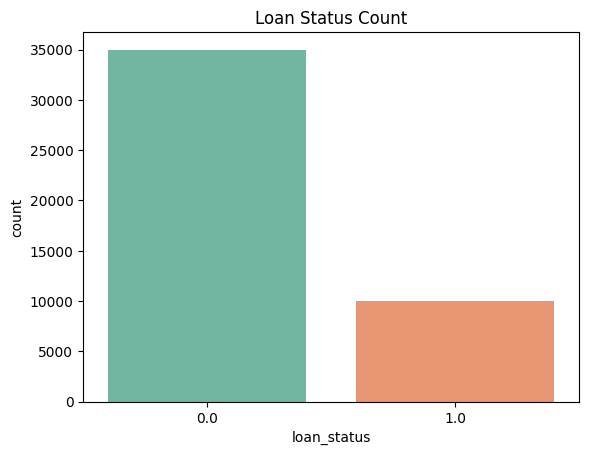

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#df = pd.read_csv('/loan_data.csv')
sns.countplot(x="loan_status", data=df, palette="Set2")
plt.title("Loan Status Count")
plt.show()

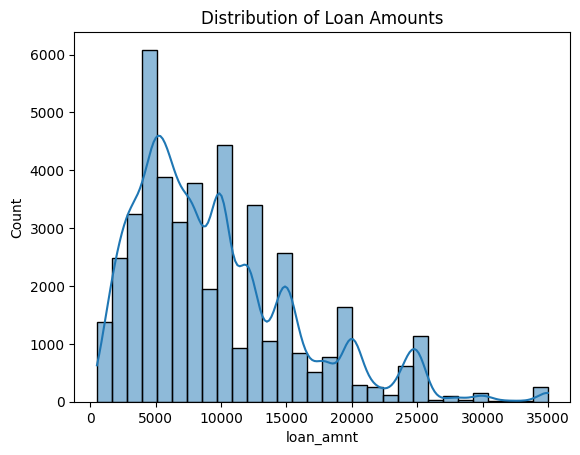

In [ ]:
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title("Distribution of Loan Amounts")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

NameError: name 'df_numeric' is not defined

In [ ]:
import pandas as pd
df = pd.read_excel('/content/loan_data.csv.xlsx')

In [ ]:
df_numeric = df.select_dtypes(include=['number'])

EDA Insights (example for your dataset) Most borrowers have income below 30,000. Borrowers with low credit scores are more likely to default. Previous defaults strongly increase chances of new defaults. Loan amount relative to income (loan_percent_income) is a strong predictor of default. ### Outliers exist in person_income and loan_amnt. 2. Model to Use on Dataset Since this is a binary classification problem (loan_status: 0 = no default, 1 = default): Models to try: Baseline model → Predict the majority class. Logistic Regression → Simple, interpretable. Random Forest / Decision Tree → Handles non-linear relationships. XGBoost / Gradient Boosting → High accuracy, great for tabular data. 3. Handling Missing Values Even if your dataset looks complete, always check: # Check missing values print(df.isnull().sum()) Ways to handle: Numeric columns → Fill with median (better for skewed data). df['person_income'].fillna(df['person_income'].median(), inplace=True) Categorical columns → Fill with mode (most frequent value). df['person_education'].fillna(df['person_education'].mode()[0], inplace=True) Too many missing values? → Drop the column. df.drop('column_name', axis=1, inplace=True) """

In [ ]:
print(df.isnull().sum())

person_age                        0
person_gender                     0
person_education                  0
person_income                     2
person_emp_exp                    5
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     2
loan_percent_income               2
cb_person_cred_hist_length        5
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       1
dtype: int64


In [ ]:
df['person_income'].fillna(df['person_income'].median(), inplace=True)

# Fill missing employment experience (years worked) with the median
df['person_emp_exp'].fillna(df['person_emp_exp'].median(), inplace=True)

# Fill missing loan interest rates with the median rate
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

# Fill missing loan_percent_income (loan amount / income ratio) with median
df['loan_percent_income'].fillna(df['loan_percent_income'].median(), inplace=True)

# Fill missing credit history length with the median value
df['cb_person_cred_hist_length'].fillna(df['cb_person_cred_hist_length'].median(), inplace=True)

# Drop rows where the target column 'loan_status' is missing # (only 1 row is missing, so better to remove it instead of guessing)
df.dropna(subset=['loan_status'], inplace=True)

# Double check if all missing values are handled
print(df.isnull().sum())

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


/tmp/ipython-input-4062620097.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_income'].fillna(df['person_income'].median(), inplace=True)
/tmp/ipython-input-4062620097.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print(df.head())

   person_age person_gender person_education  person_income  person_emp_exp  \
0          22        female           Master      -0.104016       -0.892327   
1          21        female      High School      -0.846032       -0.892327   
2          25        female      High School      -0.844092       -0.397558   
3          23        female         Bachelor      -0.006952       -0.892327   
4          24          male           Master      -0.176307       -0.727404   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT   4.025067    PERSONAL       1.683108   
1                   OWN  -1.359199   EDUCATION       0.044798   
2              MORTGAGE  -0.646575     MEDICAL       0.625592   
3                  RENT   4.025067     MEDICAL       1.417889   
4                  RENT   4.025067     MEDICAL       1.095599   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0             4.016516                   -0.739130           561  

In [ ]:
df=pd.get_dummies(df, drop_first=True)
print(df.head())

   person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0          22      -0.104016       -0.892327   4.025067       1.683108   
1          21      -0.846032       -0.892327  -1.359199       0.044798   
2          25      -0.844092       -0.397558  -0.646575       0.625592   
3          23      -0.006952       -0.892327   4.025067       1.417889   
4          24      -0.176307       -0.727404   4.025067       1.095599   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0             4.016516                   -0.739130           561          1.0   
1            -0.684844                   -0.996884           504          0.0   
2             3.443179                   -0.739130           635          1.0   
3             3.443179                   -0.996884           675          1.0   
4             4.475185                   -0.481375           586          1.0   

   person_gender_male  ...  person_education_Master  \
0            

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

X=df.drop('loan_status', axis=1)
Y=df['loan_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model=LogisticRegression()
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)

print(roc_auc_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.8397364526125723
[[6571  398]
 [ 535 1496]]
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      6969
         1.0       0.79      0.74      0.76      2031

    accuracy                           0.90      9000
   macro avg       0.86      0.84      0.85      9000
weighted avg       0.89      0.90      0.90      9000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:59:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost Results ===
ROC AUC: 0.9782911436092553
Confusion Matrix:
 [[6758  211]
 [ 395 1636]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      6969
         1.0       0.89      0.81      0.84      2031

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



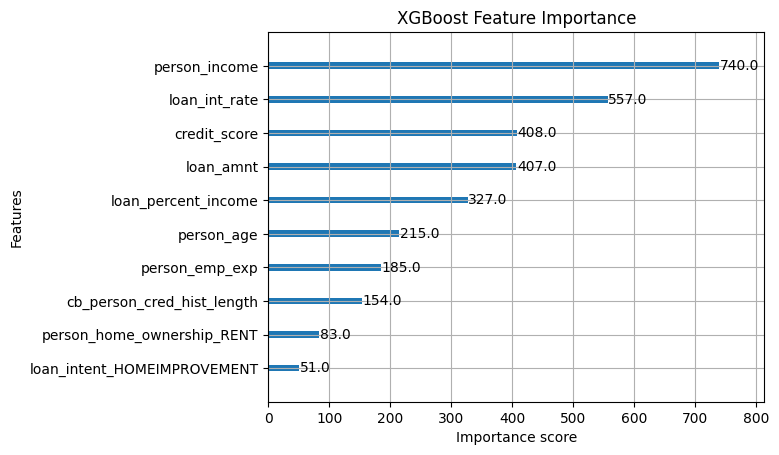

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7969, number of negative: 28030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1240
[LightGBM] [Info] Number of data points in the train set: 35999, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221367 -> initscore=-1.257716
[LightGBM] [Info] Start training from score -1.257716

=== LightGBM Results ===
ROC AUC: 0.9772358264662122
Confusion Matrix:
 [[6773  196]
 [ 425 1606]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      6969
         1.0       0.89      0.79      0.84      2031

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90  

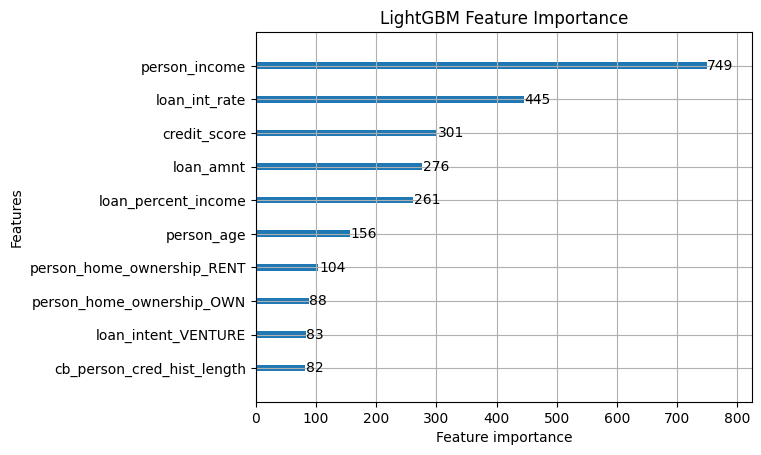

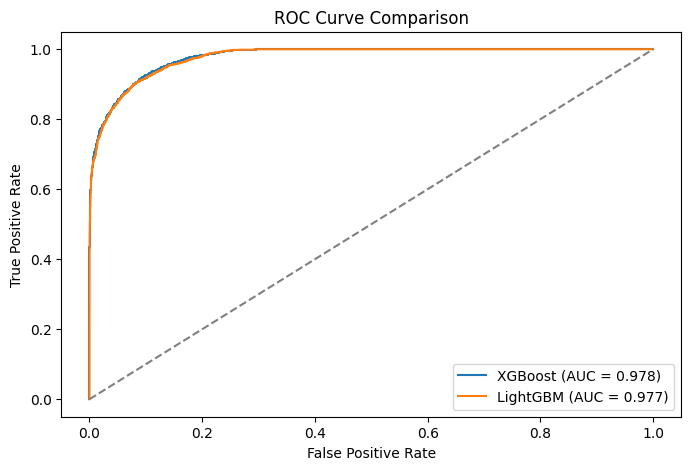


Top 10 High Risk Borrowers (by XGBoost probability):
       Actual  XGB_Prob_Default  LGB_Prob_Default
4352      1.0          0.999994          0.998714
9142      1.0          0.999992          0.998850
43505     1.0          0.999990          0.998871
43571     1.0          0.999990          0.999051
20349     1.0          0.999987          0.998902
43088     1.0          0.999984          0.998601
27890     1.0          0.999978          0.998093
15937     1.0          0.999978          0.995297
42961     1.0          0.999975          0.998419
21813     1.0          0.999974          0.998652


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve

import xgboost as xgb
import lightgbm as lgb

X = df.drop('loan_status', axis=1)
Y = df['loan_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


 #1. Train XGBoost

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)
Y_pred_xgb_proba = xgb_model.predict_proba(X_test)[:,1]

print("=== XGBoost Results ===")
print("ROC AUC:", roc_auc_score(Y_test, Y_pred_xgb_proba))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_xgb))
print(classification_report(Y_test, Y_pred_xgb))

# Feature Importance
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title("XGBoost Feature Importance")
plt.show()


# 2. Train LightGBM

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, Y_train)
Y_pred_lgb = lgb_model.predict(X_test)
Y_pred_lgb_proba = lgb_model.predict_proba(X_test)[:,1]

print("\n=== LightGBM Results ===")
print("ROC AUC:", roc_auc_score(Y_test, Y_pred_lgb_proba))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_lgb))
print(classification_report(Y_test, Y_pred_lgb))

# Feature Importance
lgb.plot_importance(lgb_model, max_num_features=10)
plt.title("LightGBM Feature Importance")
plt.show()


# 3. Compare ROC Curves

fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, Y_pred_xgb_proba)
fpr_lgb, tpr_lgb, _ = roc_curve(Y_test, Y_pred_lgb_proba)

plt.figure(figsize=(8,5))
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost (AUC = %.3f)" % roc_auc_score(Y_test, Y_pred_xgb_proba))
plt.plot(fpr_lgb, tpr_lgb, label="LightGBM (AUC = %.3f)" % roc_auc_score(Y_test, Y_pred_lgb_proba))
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


# 4. Map top risky borrowers

df_risk = pd.DataFrame({
    "Actual": Y_test,
    "XGB_Prob_Default": Y_pred_xgb_proba,
    "LGB_Prob_Default": Y_pred_lgb_proba
}, index=X_test.index)

# Sort by risk (higher probability of default first)
top_risky = df_risk.sort_values(by="XGB_Prob_Default", ascending=False).head(10)
print("\nTop 10 High Risk Borrowers (by XGBoost probability):")
print(top_risky)








In [ ]:

from sklearn.model_selection import RandomizedSearchCV

# XGBoost tuning
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0]
}
xgb_search = RandomizedSearchCV(xgb_model, param_grid_xgb, n_iter=5, scoring='roc_auc', cv=3, random_state=42)
xgb_search.fit(X_train, Y_train)

print("Best XGBoost Params:", xgb_search.best_params_)
print("Best XGBoost AUC:", xgb_search.best_score_)

# LightGBM tuning
lgb_model = lgb.LGBMClassifier(random_state=42)
param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70]
}
lgb_search = RandomizedSearchCV(lgb_model, param_grid_lgb, n_iter=5, scoring='roc_auc', cv=3, random_state=42)
lgb_search.fit(X_train, Y_train)

print("Best LightGBM Params:", lgb_search.best_params_)
print("Best LightGBM AUC:", lgb_search.best_score_)






/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:59:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:59:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:59:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:59:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:59:56] WARNING: /w

Best XGBoost Params: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05}
Best XGBoost AUC: 0.9712643116632443
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5312, number of negative: 18687
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1221
[LightGBM] [Info] Number of data points in the train set: 23999, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221343 -> initscore=-1.257860
[LightGBM] [Info] Start training from score -1.257860
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5313, number of negative: 18686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of te

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_threshold(y_true, y_probs, threshold=0.5):
    y_pred = (y_probs >= threshold).astype(int)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Threshold: {threshold:.2f} | Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

# Try different thresholds for XGBoost
for t in [0.3, 0.5, 0.7]:
    evaluate_threshold(Y_test, Y_pred_xgb_proba, threshold=t)


Threshold: 0.30 | Precision: 0.79, Recall: 0.88, F1: 0.83
Threshold: 0.50 | Precision: 0.89, Recall: 0.81, F1: 0.84
Threshold: 0.70 | Precision: 0.95, Recall: 0.72, F1: 0.82


In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
0.0,34999
1.0,10000


In [ ]:
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
from imblearn.over_sampling import RandomOverSampler


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


<Axes: xlabel='loan_status', ylabel='count'>

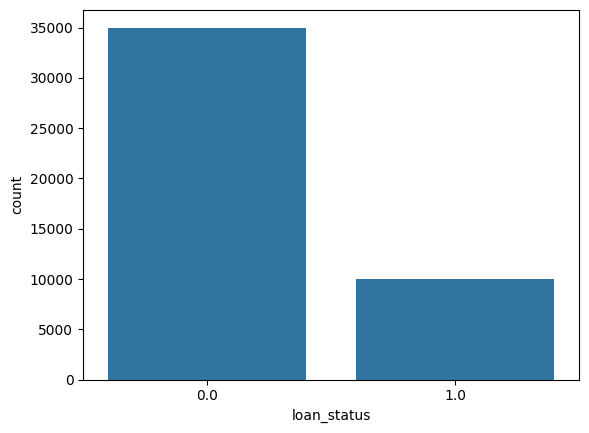

In [ ]:
import seaborn as sns
sns.countplot(x='loan_status', data=df)


In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print(y_res.value_counts())


loan_status
1.0    34999
0.0    34999
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      6969
         1.0       0.67      0.84      0.75      2031

    accuracy                           0.87      9000
   macro avg       0.81      0.86      0.83      9000
weighted avg       0.89      0.87      0.88      9000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
